In [261]:
### import dataset
!pip install opendatasets

In [262]:
import opendatasets as od
dataset = 'https://www.kaggle.com/vicsuperman/prediction-of-music-genre/download'
od.download(dataset)
## username and key can be found on your Kaggle account --> Account --> API --> Create API Token --> open the 
## .json file

Skipping, found downloaded files in "./prediction-of-music-genre" (use force=True to force download)


In [263]:
import os
import pandas as pd
data_dir = './prediction-of-music-genre'
os.listdir(data_dir)

['music_genre.csv']

In [294]:
df = pd.read_csv('prediction-of-music-genre/music_genre.csv')
print(df.head())

   instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.2

In [295]:
## remove irrelevant columns
del df['instance_id'], df['artist_name'], df['track_name'], df['obtained_date'] 
print(df.loc[9995:10005])

       popularity  acousticness  danceability  duration_ms  energy  \
9995         39.0      0.030100         0.504     302080.0   0.860   
9996         33.0      0.000456         0.517     258480.0   0.868   
9997         21.0      0.106000         0.527     134787.0   0.262   
9998         44.0      0.030300         0.271     275933.0   0.969   
9999         14.0      0.020000         0.573     226374.0   0.921   
10000         NaN           NaN           NaN          NaN     NaN   
10001         NaN           NaN           NaN          NaN     NaN   
10002         NaN           NaN           NaN          NaN     NaN   
10003         NaN           NaN           NaN          NaN     NaN   
10004         NaN           NaN           NaN          NaN     NaN   
10005        44.0      0.006210         0.711     285987.0   0.621   

       instrumentalness  key  liveness  loudness   mode  speechiness  \
9995           0.000038   F#     0.254    -4.059  Major       0.1380   
9996           

In [296]:
## remove blank rows
df = df.dropna(how='any',axis=0) 
print(df.loc[9995:10005])

       popularity  acousticness  danceability  duration_ms  energy  \
9995         39.0      0.030100         0.504     302080.0   0.860   
9996         33.0      0.000456         0.517     258480.0   0.868   
9997         21.0      0.106000         0.527     134787.0   0.262   
9998         44.0      0.030300         0.271     275933.0   0.969   
9999         14.0      0.020000         0.573     226374.0   0.921   
10005        44.0      0.006210         0.711     285987.0   0.621   

       instrumentalness key  liveness  loudness   mode  speechiness  \
9995           0.000038  F#     0.254    -4.059  Major       0.1380   
9996           0.000594   B     0.183    -3.696  Minor       0.0343   
9997           0.167000   F     0.146   -17.812  Major       0.0394   
9998           0.000490  C#     0.301    -2.539  Major       0.0678   
9999           0.000004  F#     0.325    -3.841  Major       0.0734   
10005          0.029700   G     0.159    -7.429  Major       0.0382   

           

In [297]:
## calculate proportion of unknown data
unknown_duration = df[df['duration_ms']==-1].shape[0]
unknown_tempo = df[df['tempo']=='?'].shape[0]
print(unknown_duration/(df.shape[0]))
print(unknown_tempo/(df.shape[0]))

0.09878
0.0996


In [298]:
## delete rows containing unknown values
df = df[df['tempo']!='?'] 
df = df[df['duration_ms']!=-1.0]
df['tempo'] = df['tempo'].astype(float) 
print(df['music_genre'].value_counts()) 

Rock           4099
Hip-Hop        4077
Anime          4064
Jazz           4064
Alternative    4051
Country        4049
Blues          4046
Rap            4042
Classical      4036
Electronic     4032
Name: music_genre, dtype: int64


In [299]:
## converting 'music_genre' from str to int
df_genre = df['music_genre']
genre = df_genre.to_numpy()
GenreDict = {
    "Electronic": 0,
    "Anime": 1,
    "Jazz": 2,
    "Alternative": 3,
    "Country": 4,
    "Rap": 5,
    "Blues": 6,
    "Rock": 7,
    "Classical": 8,
    "Hip-Hop": 9,
}
def transform_genres(arr):
    genre_list = []
    for x in range(arr.shape[0]):
        g = GenreDict[arr[x]]
        genre_list.append(g)
    return genre_list
df['music_genre'] = transform_genres(genre)
print(df['music_genre'].head())

1    0
2    0
3    0
4    0
6    0
Name: music_genre, dtype: int64


In [300]:
## combine 'key' and 'mode' to 'scale' and then one-hot encode 'scale'
df_key = df[['key','mode']].fillna("")
key = df_key.to_numpy()

KeyDict = {
    "Major": "",
    "Minor": "m",
    "":""
}
def transform_scales(arr):
    scale_list = []
    for x in range(arr.shape[0]):
        rootnote = arr[x][0]
        mode = KeyDict[arr[x][1]]
        if rootnote != "":
            scale = rootnote + mode
        scale_list.append(scale)
    return scale_list
df['scale'] = transform_scales(key)

y = pd.get_dummies(df.scale, prefix='scale')
del df['key'], df['mode']
df = df.drop('scale',axis=1)
df = df.join(y)
print(df.head())

   popularity  acousticness  danceability  duration_ms  energy  \
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   
6        46.0       0.02890         0.572     214408.0   0.803   

   instrumentalness  liveness  loudness  speechiness    tempo  ...  scale_E  \
1          0.950000     0.124    -7.043       0.0300  115.002  ...        0   
2          0.011800     0.534    -4.617       0.0345  127.994  ...        0   
3          0.002530     0.157    -4.498       0.2390  128.014  ...        0   
4          0.909000     0.157    -6.266       0.0413  145.036  ...        0   
6          0.000008     0.106    -4.294       0.3510  149.995  ...        0   

   scale_Em  scale_F  scale_F#  scale_F#m  scale_Fm  scale_G  scale_G#  \
1         0        0         0          0         0   

In [301]:
## reorder columns
df = df[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','scale_Cm','scale_C','scale_C#m','scale_C#','scale_Dm','scale_D','scale_D#m','scale_D#','scale_Em','scale_E','scale_Fm','scale_F','scale_F#m','scale_F#','scale_Gm','scale_G','scale_G#m','scale_G#','scale_Am','scale_A','scale_A#m','scale_A#','scale_Bm','scale_B','music_genre']]
print(df.columns)

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'scale_Cm', 'scale_C', 'scale_C#m', 'scale_C#', 'scale_Dm',
       'scale_D', 'scale_D#m', 'scale_D#', 'scale_Em', 'scale_E', 'scale_Fm',
       'scale_F', 'scale_F#m', 'scale_F#', 'scale_Gm', 'scale_G', 'scale_G#m',
       'scale_G#', 'scale_Am', 'scale_A', 'scale_A#m', 'scale_A#', 'scale_Bm',
       'scale_B', 'music_genre'],
      dtype='object')


In [302]:
## Splitting the dataset into TRAINING data and TEST data
import tensorflow as tf
import keras
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['music_genre'])
Y = df[['music_genre']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [303]:
## normalising the TRAINING data
MaxDict = {
    'duration_ms': X_train['duration_ms'].max(),
    'tempo': X_train['tempo'].max(),
    'popularity': X_train['popularity'].max(),
    'loudness': X_train['loudness'].max()
}
MinDict = {
    'duration_ms': X_train['duration_ms'].min(),
    'tempo': X_train['tempo'].min(),
    'popularity': X_train['popularity'].min(),
    'loudness': X_train['loudness'].min()
}

def NormalizeTrain(c):
    return (X_train[c]-MinDict[c])/(MaxDict[c]-MinDict[c])

X_train['loudness'] = NormalizeTrain('loudness')
X_train['duration_ms'] = NormalizeTrain('duration_ms')
X_train['popularity'] = NormalizeTrain('popularity')
X_train['tempo'] = NormalizeTrain('tempo')
print(X_train.head())

       popularity  acousticness  danceability  duration_ms  energy  \
49054    0.595960      0.007500         0.796     0.048330   0.357   
44947    0.292929      0.760000         0.169     0.057152   0.158   
68       0.272727      0.000355         0.814     0.081022   0.877   
3934     0.303030      0.005330         0.421     0.033191   0.800   
14954    0.333333      0.488000         0.814     0.045129   0.693   

       instrumentalness  liveness  loudness  speechiness     tempo  ...  \
49054             0.000    0.0966  0.721870       0.3440  0.622238  ...   
44947             0.930    0.1040  0.570650       0.0396  0.422236  ...   
68                0.455    0.2060  0.820614       0.0533  0.471449  ...   
3934              0.332    0.3810  0.840820       0.3030  0.836814  ...   
14954             0.190    0.1080  0.813695       0.0360  0.487600  ...   

       scale_Gm  scale_G  scale_G#m  scale_G#  scale_Am  scale_A  scale_A#m  \
49054         0        0          0         0    

<ipython-input-303-84ea5a385f62>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['loudness'] = NormalizeTrain('loudness')
<ipython-input-303-84ea5a385f62>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['duration_ms'] = NormalizeTrain('duration_ms')
<ipython-input-303-84ea5a385f62>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [304]:
## Constructing the Neural Network
model = keras.Sequential()

model.add(keras.layers.Dense(35, input_shape=(35,), activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [305]:
## Training
Y_pred_train = model.fit(X_train, Y_train, batch_size=16, epochs=15)

Epoch 1/15
2028/2028 [==============================] - 6s 3ms/step - loss: 2.0492 - sparse_categorical_accuracy: 0.2828A: 1s - loss: 2.0936 - sparse_categor
Epoch 2/15
2028/2028 [==============================] - 5s 3ms/step - loss: 1.6943 - sparse_categorical_accuracy: 0.4077
Epoch 3/15
2028/2028 [==============================] - 6s 3ms/step - loss: 1.5075 - sparse_categorical_accuracy: 0.4646
Epoch 4/15
2028/2028 [==============================] - 7s 3ms/step - loss: 1.4100 - sparse_categorical_accuracy: 0.4878
Epoch 5/15
2028/2028 [==============================] - 10s 5ms/step - loss: 1.3529 - sparse_categorical_accuracy: 0.5023: 2s - loss: 1.35
Epoch 6/15
2028/2028 [==============================] - 10s 5ms/step - loss: 1.3176 - sparse_categorical_accuracy: 0.5103: 
Epoch 7/15
2028/2028 [==============================] - 7s 3ms/step - loss: 1.2943 - sparse_categorical_accuracy: 0.5185
Epoch 8/15
2028/2028 [==============================] - 4s 2ms/step - loss: 1.2779 - sparse_cat

In [306]:
## Normalize the TEST data for testing
def NormalizeTest(c):
    return (X_test[c]-MinDict[c])/(MaxDict[c]-MinDict[c])

X_test['loudness'] = NormalizeTest('loudness')
X_test['duration_ms'] = NormalizeTest('duration_ms')
X_test['popularity'] = NormalizeTest('popularity')
X_test['tempo'] = NormalizeTest('tempo')
print(X_test.head())

       popularity  acousticness  danceability  duration_ms  energy  \
4135     0.363636         0.230         0.432     0.105441   0.810   
40255    0.000000         0.985         0.423     0.053798   0.152   
33635    0.424242         0.595         0.811     0.127887   0.373   
30398    0.626263         0.706         0.663     0.075633   0.264   
35856    0.505051         0.183         0.728     0.036762   0.604   

       instrumentalness  liveness  loudness  speechiness     tempo  ...  \
4135           0.438000    0.7170  0.802306       0.0308  0.351521  ...   
40255          0.909000    0.1070  0.479314       0.0451  0.556444  ...   
33635          0.144000    0.0427  0.737422       0.0438  0.319482  ...   
30398          0.000000    0.1000  0.662823       0.0914  0.474025  ...   
35856          0.000005    0.1630  0.843392       0.0429  0.299163  ...   

       scale_Gm  scale_G  scale_G#m  scale_G#  scale_Am  scale_A  scale_A#m  \
4135          1        0          0         0    

<ipython-input-306-4f7d18821a54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['loudness'] = NormalizeTest('loudness')
<ipython-input-306-4f7d18821a54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['duration_ms'] = NormalizeTest('duration_ms')
<ipython-input-306-4f7d18821a54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [307]:
## Predictions
Y_pred_test = model.predict(X_test)
Y_pred_tra = model.predict(X_train)

In [308]:
## Computing the Confusion Matrix
from sklearn import metrics
import random

predict = []
predict2 = []
for k in range(Y_pred_test.shape[0]):
    verdict = Y_pred_test[k].tolist()
    VerdictGenre = verdict.index(max(verdict))
    predict.append(VerdictGenre)

for k in range(Y_pred_tra.shape[0]):
    verdict2 = Y_pred_tra[k].tolist()
    VerdictGenre2 = verdict2.index(max(verdict2))
    predict2.append(VerdictGenre2)
    
print('Confusion Matrix - Test Dataset')
print(metrics.confusion_matrix(Y_test, predict))
print(metrics.classification_report(Y_test,predict))

print('Confusion Matrix - Train Dataset')
print(metrics.confusion_matrix(Y_train, predict2))
print(metrics.classification_report(Y_train,predict2))

Confusion Matrix - Test Dataset
[[469  77 107  64  31  19  33  16   7  20]
 [ 53 520  28  31  26   0  73   4  92   0]
 [107  24 404  17  37   1  79  36  48  29]
 [ 53   4  66 245 153  39  21 151   1  64]
 [ 30  27  44  73 372  11  81 149   0  17]
 [  8   0   5  36  15 365   0  92   0 261]
 [ 39 153 110  25  82   1 339  31  11   1]
 [  7   1  24 100  56  67   0 571   1  13]
 [ 12  36  52  19   6   0  16   5 675   0]
 [ 10   0  12  47  19 350   3  37   0 346]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       843
           1       0.62      0.63      0.62       827
           2       0.47      0.52      0.49       782
           3       0.37      0.31      0.34       797
           4       0.47      0.46      0.46       804
           5       0.43      0.47      0.45       782
           6       0.53      0.43      0.47       792
           7       0.52      0.68      0.59       840
           8       0.81      0.82      0.82       

In [309]:
## Accessing Spotify API
import time
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '6dd7b81de676477d9eb63f64976ea593'
client_secret = 'a540d7498de4413495aacea5fa911eb5'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

In [310]:
## Obtain the row of data of any Spotify track, which contains the exact same columns with the dataset
def getscalelist(root,mode):
    scale_list = [0]*24
    i = 2*(root-1)+mode
    scale_list[i] = 1
    return scale_list

def getTrack(l):
    output = []
    final = []
    for n in range(len(l)):
        t = sp.audio_features(l[n])[0]
        u = sp.track(l[n])
        pop = u['popularity']/100
        aco = t['acousticness']
        dan = t['danceability']
        dur = t['duration_ms']/4497994.0
        ene = t['energy']
        ins = t['instrumentalness']
        liv = t['liveness']
        lou = 1 - (t['loudness']/-60)
        spe = t['speechiness']
        tem = t['tempo']/220.27599999999998
        val = t['valence']
        sca = getscalelist(t['key'],t['mode'])
        final.extend([pop,aco,dan,dur,ene,ins,liv,lou,spe,tem,val])
        for x in sca:
            final.append(x)
        output.append(final)
    return output

print(getTrack(['spotify:track:2rtGaCAeYtmcIvuZsvgTf6']))

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


[[0.66, 0.316, 0.167, 0.0792204258164862, 0.302, 0.797, 0.11, 0.8059333333333334, 0.0345, 0.4631734732789773, 0.19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


The model predicts the genre of "Never Gonna Give You Up" by Rick Astley to be Rock with 15.8% confidence.


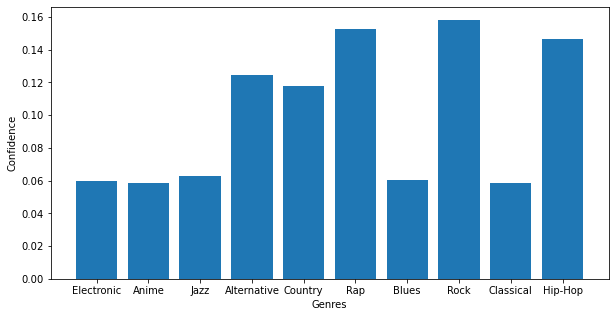

In [311]:
## Predict the genre of any Spotify Track
GenreDict2 = {
    0: "Electronic",
    1: "Anime",
    2: "Jazz",
    3: "Alternative",
    4: "Country",
    5: "Rap",
    6: "Blues",
    7: "Rock",
    8: "Classical",
    9: "Hip-Hop",
}

def PREDICT_URI(URI):
    v = getTrack([URI])
    probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
    predictions = probability_model.predict(v)
    verdict = predictions[0].tolist()
    Confidence = max(verdict)
    VerdictGenre = GenreDict2[verdict.index(max(verdict))]
    TrackName = sp.track(URI)['name']
    ArtistName = sp.track(URI)['artists'][0]['name']
    xr = ['Electronic','Anime','Jazz','Alternative','Country','Rap','Blues','Rock','Classical','Hip-Hop']
    plt.figure(figsize=(10,5))
    plt.bar(xr, verdict, width=0.8)
    plt.xlabel('Genres')
    plt.ylabel('Confidence')
    return 'The model predicts the genre of "{}" by {} to be {} with {}% confidence.'.format(TrackName,ArtistName,VerdictGenre,round(Confidence*100,1))

print(PREDICT_URI('spotify:track:4cOdK2wGLETKBW3PvgPWqT')) ## Insert Track URI in brackets